In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARMA, ARIMA, ARMAResults, ARIMAResults
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.tools import diff
from statsmodels.tools.eval_measures import mse, rmse
from pmdarima import auto_arima
%matplotlib inline

In [4]:
# Satitoanry 
dtfb=pd.read_csv('../Data/DailyTotalFemaleBirths.csv',index_col='Date', parse_dates=True)
dtfb.index.freq='D'
print(dtfb.shape)
dtfb=dtfb.iloc[:120]
print(dtfb.shape)
dtfb.head()

(365, 1)
(120, 1)


,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


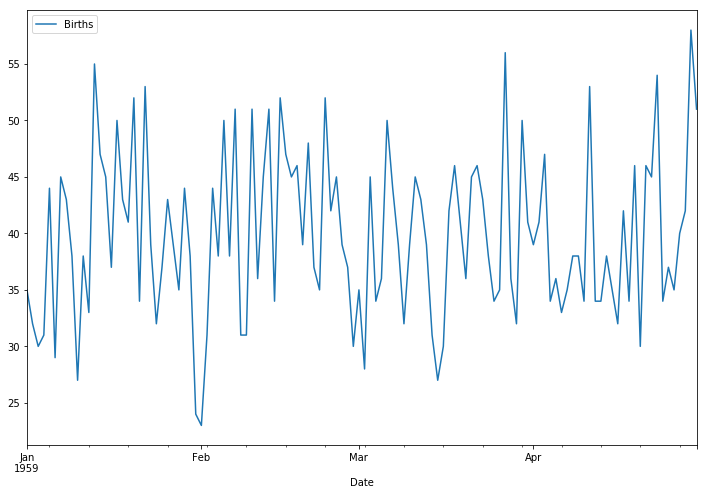

In [5]:
dtfb.plot(figsize=(12,8));

In [6]:
TradeI=pd.read_csv('../Data/TradeInventories.csv',index_col='Date', parse_dates=True)
TradeI.index.freq='MS'
TradeI.head()

,Inventories
Date,
1997-01-01,1301161
1997-02-01,1307080
1997-03-01,1303978
1997-04-01,1319740
1997-05-01,1327294


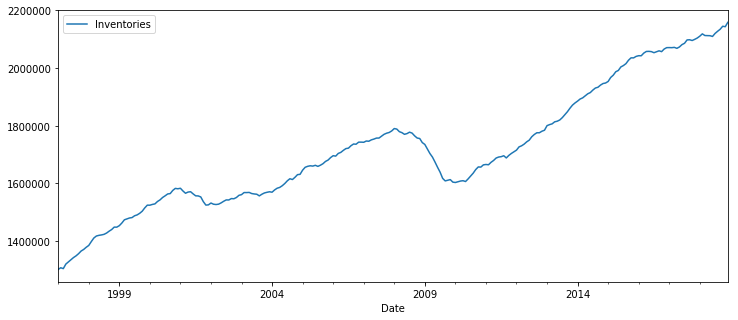

In [7]:
TradeI.plot(figsize=(12,5));

In [8]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    print('\n')
    print('######################################################')
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [9]:
adf_test(dtfb['Births'],title='Daily Births')

Augmented Dickey-Fuller Test: Daily Births
ADF test statistic     -9.855384e+00
p-value                 4.373545e-17
# lags used             0.000000e+00
# observations          1.190000e+02
critical value (1%)    -3.486535e+00
critical value (5%)    -2.886151e+00
critical value (10%)   -2.579896e+00


######################################################
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [10]:
stepwise_fit=auto_arima(dtfb['Births'],seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
stepwise_fit.summary()

Fit ARIMA: order=(2, 0, 2); AIC=822.741, BIC=839.466, Fit time=0.658 seconds
Fit ARIMA: order=(0, 0, 0); AIC=823.489, BIC=829.064, Fit time=0.004 seconds
Fit ARIMA: order=(1, 0, 0); AIC=824.647, BIC=833.010, Fit time=0.028 seconds
Fit ARIMA: order=(0, 0, 1); AIC=824.747, BIC=833.110, Fit time=0.031 seconds
Fit ARIMA: order=(1, 0, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(3, 0, 2); AIC=830.714, BIC=850.226, Fit time=0.570 seconds
Fit ARIMA: order=(2, 0, 1); AIC=828.129, BIC=842.067, Fit time=0.184 seconds
Fit ARIMA: order=(2, 0, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 1); AIC=826.399, BIC=837.549, Fit time=0.108 seconds
Fit ARIMA: order=(3, 0, 3); AIC=nan, BIC=nan, Fit time=0.604 seconds
Total fit time: 2.345 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                      y   No. Observations:                  120
Model:                     ARMA(2, 2)   Log Likelihood                -405.370
Method:                       css-mle   S.D. of innovations              6.991
Date:                Mon, 17 Jun 2019   AIC                            822.741
Time:                        08:44:20   BIC                            839.466
Sample:                             0   HQIC                           829.533
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.8163      0.108    368.836      0.000      39.605      40.028
ar.L1.y        1.8568      0.081     22.931      0.000       1.698       2.016
ar.L2.y       -0.8814      0.073    -12.030      0.000      -1.025      -0.738
ma.L1.y       -1.8631      0.109    -17.130      0.000      -2.076      -1.650
ma.L2.y        0.8631      0.108      8.020      0.000       0.652       1.074
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0533           -0.1583j            1.0652           -0.0237
AR.2            1.0533           +0.1583j            1.0652            0.0237
MA.1            1.0000           +0.0000j            1.0000            0.0000
MA.2            1.1586           +0.0000j            1.1586            0.0000
-----------------------------------------------------------------------------
"""

In [11]:
train=dtfb.iloc[:90]
test=dtfb.iloc[90:]

In [12]:
model=ARMA(train['Births'],order=(2,2))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 Births   No. Observations:                   90
Model:                     ARMA(2, 2)   Log Likelihood                -307.905
Method:                       css-mle   S.D. of innovations              7.405
Date:                Mon, 17 Jun 2019   AIC                            627.809
Time:                        08:44:20   BIC                            642.808
Sample:                    01-01-1959   HQIC                           633.858
                         - 03-31-1959                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           39.7549      0.912     43.607      0.000      37.968      41.542
ar.L1.Births    -0.1850      1.087     -0.170      0.865      -2.315       1.945
ar.L2.Births     0.4352      0.644      0.675      0.501      -0.828       1.698
ma.L1.Births     0.2777      1.097      0.253      0.801      -1.872       2.427
ma.L2.Births    -0.3999      0.679     -0.589      0.557      -1.730       0.930
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3181           +0.0000j            1.3181            0.5000
AR.2            1.7434           +0.0000j            1.7434            0.0000
MA.1           -1.2718           +0.0000j            1.2718            0.5000
MA.2            1.9662           +0.0000j            1.9662            0.0000
-----------------------------------------------------------------------------
"""

In [13]:
start_=len(train)
end_=start_+len(test)-1
prediction=results.predict(start=start_, end=end_).rename('ARMA_Ord_2_2')

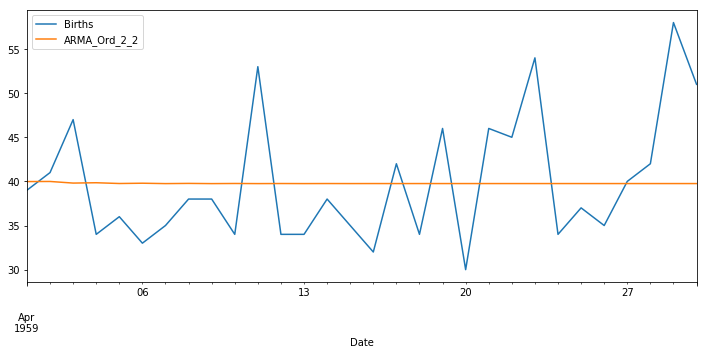

In [14]:
test.plot(figsize=(12,5), legend=True)
prediction.plot(legend=True);

In [15]:
print(test.mean(),prediction.mean())

Births    39.833333
dtype: float64 39.77743305558512


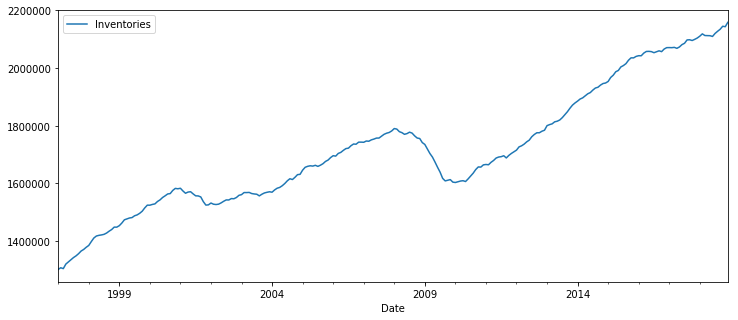

In [16]:
TradeI.plot(figsize=(12,5));

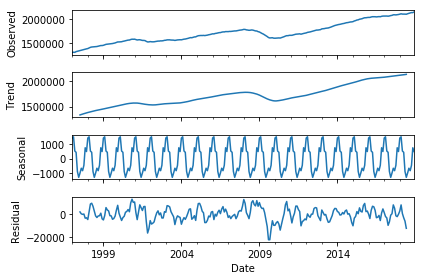

In [17]:
decompose_TradeI=seasonal_decompose(TradeI['Inventories'],model='add')
decompose_TradeI.plot();

In [18]:
TradeI_fit=auto_arima(TradeI['Inventories'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)

Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.133 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.812, Fit time=0.057 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.142 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.527, BIC=5247.387, Fit time=0.207 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.506, BIC=5242.794, Fit time=0.287 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.292 seconds
Total fit time: 1.213 seconds


In [19]:
TradeI_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.266
Date:                Mon, 17 Jun 2019   AIC                           5228.506
Time:                        08:44:25   BIC                           5242.794
Sample:                             1   HQIC                          5234.248
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3443.0310   1312.158      2.624      0.009     871.249    6014.813
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5731      0.076     -7.544      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7449           +0.0000j            1.7449            0.0000
-----------------------------------------------------------------------------
"""

In [20]:
TradeI['Inventories_diff_1']=diff(TradeI['Inventories'],k_diff=1)
adf_test(TradeI['Inventories_diff_1'],title='Inventories_diff_1')

Augmented Dickey-Fuller Test: Inventories_diff_1
ADF test statistic       -3.412249
p-value                   0.010548
# lags used               4.000000
# observations          258.000000
critical value (1%)      -3.455953
critical value (5%)      -2.872809
critical value (10%)     -2.572775


######################################################
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


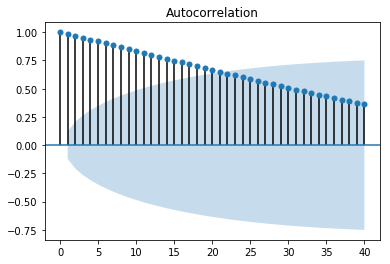

In [21]:
plot_acf(TradeI['Inventories'],lags=40);

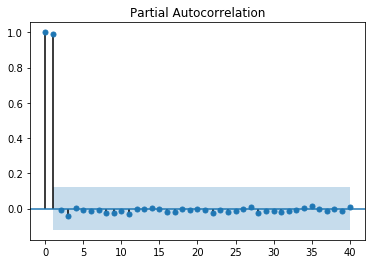

In [22]:
plot_pacf(TradeI['Inventories'],lags=40);

In [23]:
TradeI_fit=auto_arima(TradeI['Inventories'],start_p=0,start_q=0, max_p=2, max_q=2, 
                      seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
TradeI_fit.summary()

Fit ARIMA: order=(0, 1, 0); AIC=5348.037, BIC=5355.181, Fit time=0.007 seconds
Fit ARIMA: order=(1, 1, 0); AIC=5250.883, BIC=5261.599, Fit time=0.135 seconds
Fit ARIMA: order=(0, 1, 1); AIC=5283.095, BIC=5293.812, Fit time=0.056 seconds
Fit ARIMA: order=(2, 1, 0); AIC=5240.553, BIC=5254.842, Fit time=0.147 seconds
Fit ARIMA: order=(2, 1, 1); AIC=5229.527, BIC=5247.387, Fit time=0.214 seconds
Fit ARIMA: order=(1, 1, 1); AIC=5228.506, BIC=5242.794, Fit time=0.282 seconds
Fit ARIMA: order=(1, 1, 2); AIC=5229.289, BIC=5247.150, Fit time=0.298 seconds
Fit ARIMA: order=(2, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 1.190 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.266
Date:                Mon, 17 Jun 2019   AIC                           5228.506
Time:                        08:44:28   BIC                           5242.794
Sample:                             1   HQIC                          5234.248
                                                                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3443.0310   1312.158      2.624      0.009     871.249    6014.813
ar.L1.D.y      0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.y     -0.5731      0.076     -7.544      0.000      -0.722      -0.424
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1066           +0.0000j            1.1066            0.0000
MA.1            1.7449           +0.0000j            1.7449            0.0000
-----------------------------------------------------------------------------
"""

In [24]:
train=TradeI.iloc[:252]
test=TradeI.iloc[252:]

In [25]:
model = ARIMA(train['Inventories'],order=(1,1,1))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:          D.Inventories   No. Observations:                  251
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2486.395
Method:                       css-mle   S.D. of innovations           4845.028
Date:                Mon, 17 Jun 2019   AIC                           4980.790
Time:                        08:44:28   BIC                           4994.892
Sample:                    02-01-1997   HQIC                          4986.465
                         - 12-01-2017                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3197.5697   1344.874      2.378      0.018     561.666    5833.473
ar.L1.D.Inventories     0.9026      0.039     23.010      0.000       0.826       0.979
ma.L1.D.Inventories    -0.5581      0.079     -7.048      0.000      -0.713      -0.403
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1080           +0.0000j            1.1080            0.0000
MA.1            1.7918           +0.0000j            1.7918            0.0000
-----------------------------------------------------------------------------
"""

In [26]:
start_=len(train)
end_ = start_ + len(test) - 1
pred = result.predict(start=start_, end=end_, typ='levels').rename('ARIMA (1,1,1) Prediction')

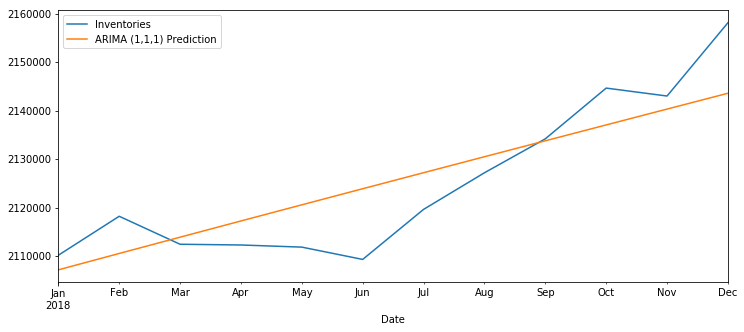

In [27]:
test['Inventories'].plot(figsize=(12,5), legend=True)
pred.plot(legend=True);

In [28]:
error_rmse=rmse(test['Inventories'],pred)
error_rmse

7789.597022970701

In [29]:
test['Inventories'].mean()

2125075.6666666665

In [30]:
pred.mean()

2125465.2710973253

In [32]:
model = ARIMA(TradeI['Inventories'],order=(1,1,1))
result = model.fit()
print(result.summary())
fcast=result.predict(start=len(TradeI), end=len(TradeI)+11, typ='levels').rename('ARIMA (1,1,1) Forecast')

                             ARIMA Model Results                              
Dep. Variable:          D.Inventories   No. Observations:                  263
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2610.253
Method:                       css-mle   S.D. of innovations           4938.266
Date:                Mon, 17 Jun 2019   AIC                           5228.506
Time:                        08:49:21   BIC                           5242.794
Sample:                    02-01-1997   HQIC                          5234.248
                         - 12-01-2018                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                3443.0310   1312.158      2.624      0.009     871.249    6014.813
ar.L1.D.Inventories     0.9037      0.039     23.413      0.000       0.828       0.979
ma.L1.D.Inventor

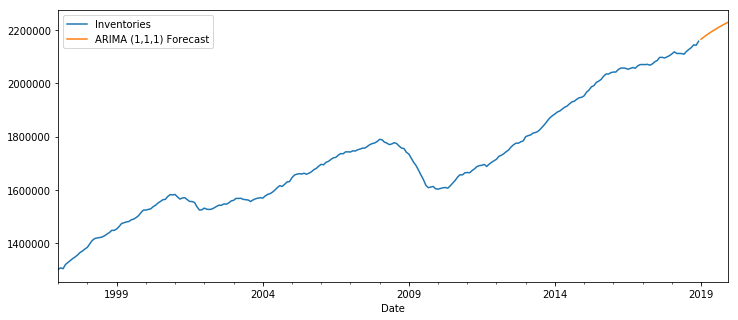

In [33]:
TradeI['Inventories'].plot(figsize=(12,5),legend=True)
fcast.plot(legend=True);